# REAL ESTATE ANALYSIS

## 1. BUSINESS UNDERSTANDING

### Introduction

Real estate is defined as the land and any permanent structures, like a home, or improvements attached to the land, whether natural or man-made. Real estate is a form of real property. It differs from personal property which is not permanently attached to the land such as vehicles, boats jewelry, furniture and farm equipment. There are five main categories of real estate which include residential, commercial, industrial, raw land and special use. Investing in real estate includes purchasing a home, rental property or land.

The real estate market refers to the buying and selling of properties, including land and buildings. The real estate market is cyclical and can be influenced by many factors such as interest rates, economic conditions, government policies, and demographics1.

The real estate market can be influenced by many factors such as interest rates, economic conditions, government policies, and demographics. Interest rates can affect the cost of borrowing money to purchase a home or property. When interest rates are low, it can make it easier for people to buy homes or properties. Economic conditions such as employment rates and consumer confidence can also impact the real estate market. Government policies such as tax incentives for homebuyers or zoning regulations can also affect the real estate market. Demographics such as population growth and migration patterns can also influence the real estate market.

Some factors that can affect the price of a property are:
    - Prices of comparable properties
    - The neighborhood
    - The home's age and condition
    - Property size
    - The state of the housing market


### Problem Statement

A real estate company has a dataset(King County House Sales Dataset) which contains the prices of properties. It wishes to use the data to optimize the recommendations they can make to buyers or sellers. The project aims to provide a deeper insight on the factors affecting the prices of property in the area.

### Objectives

- Main Objective
    - To understand various features that affect the price of a house.

- Specific Objectives
    - To build a multiple linear regression model that will help us identify how different factors affect the price of a property.
    - Identify which factors have the most positive influence and which have negative influence on the price of the house.
    - Provide information to buyers, sellers and contractors(all clients)

## 2. IMPORTING LIBRARIES 

In [403]:
# importing all needed libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats
import statsmodels.api as sm
import numpy as np
from math import radians, sin, cos, sqrt, atan2


%matplotlib inline


In [404]:
#list all files in my directory
!ls

README.md
REAL ESTATE.ipynb
data


## 3. READING DATA

In [405]:
#Importing data from kc_house_data.csv
data = pd.read_csv('data/kc_house_data.csv')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,NONE,...,7 Average,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,NO,NONE,...,7 Average,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,NO,NONE,...,6 Low Average,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,NO,NONE,...,7 Average,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,NO,NONE,...,8 Good,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [406]:
#Importing data from column_names.md
column_names = pd.read_csv('data/column_names.md', on_bad_lines='skip')
column_names

,# Column Names and Descriptions for King County Data Set
0,* `id` - Unique identifier for a house
1,* `date` - Date house was sold
2,* `price` - Sale price (prediction target)
3,* `bedrooms` - Number of bedrooms
4,* `bathrooms` - Number of bathrooms
5,* `sqft_living` - Square footage of living spa...
6,* `sqft_lot` - Square footage of the lot
7,* `floors` - Number of floors (levels) in house
8,* `waterfront` - Whether the house is on a wat...
9,* `view` - Quality of view from house


In [407]:
#Inorder to be able to read everything in the column
print(column_names.to_string())

                                                                                                            # Column Names and Descriptions for King County Data Set
0                                                                                                                             * `id` - Unique identifier for a house
1                                                                                                                                     * `date` - Date house was sold
2                                                                                                                         * `price` - Sale price (prediction target)
3                                                                                                                                  * `bedrooms` - Number of bedrooms
4                                                                                                                                * `bathrooms` - Number of bathrooms
5         

## 4. DATA PREPARATION

### 4.1 Checking Data Types and Converting to Appropriate

In [408]:
#Checking information on the dataframe and data types
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  object 
 9   view           21534 non-null  object 
 10  condition      21597 non-null  object 
 11  grade          21597 non-null  object 
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

#### 4.1.1 Changing the date data type

In [409]:
#Converting date into datetime object dtype
data['date'] = pd.to_datetime(data['date'])


#### 4.1.2 Changing sqft_basement datatype

In [410]:
#Converting the datatype and also replacing missing values with 0
data['sqft_basement'] = data['sqft_basement'].replace('?', np.nan).astype(float).fillna(0).astype(int)


### 4.2 Missing Values

Only three columns have null values(*waterfront, view & yr_renovated*). There are variuos ways to handle missing data. Let's look at individual columns one by one.

#### 4.2.1 'waterfront' Column

In [411]:
#Viewing data in the column
data['waterfront'].value_counts()

waterfront
NO     19075
YES      146
Name: count, dtype: int64

In [412]:
#Replacing the null values with 'NO' 
data['waterfront'].fillna('NO', inplace=True)


#### 4.2.2 'view' Column

In [414]:
#Viewing distribution on column data
data['view'].value_counts()

view
NONE         19422
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [415]:
#Replacing the missing values with 'NONE'
data['view'].fillna('NONE', inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21597 non-null  int64         
 1   date           21597 non-null  datetime64[ns]
 2   price          21597 non-null  float64       
 3   bedrooms       21597 non-null  int64         
 4   bathrooms      21597 non-null  float64       
 5   sqft_living    21597 non-null  int64         
 6   sqft_lot       21597 non-null  int64         
 7   floors         21597 non-null  float64       
 8   waterfront     21597 non-null  object        
 9   view           21597 non-null  object        
 10  condition      21597 non-null  object        
 11  grade          21597 non-null  object        
 12  sqft_above     21597 non-null  int64         
 13  sqft_basement  21597 non-null  int32         
 14  yr_built       21597 non-null  int64         
 15  yr_renovated   1775

#### 4.2.3 'yr_renovated' Column

In [416]:
#Viewing the distribution of data in the column
data['yr_renovated'].value_counts()

yr_renovated
0.0       17011
2014.0       73
2013.0       31
2003.0       31
2007.0       30
          ...  
1951.0        1
1953.0        1
1946.0        1
1976.0        1
1948.0        1
Name: count, Length: 70, dtype: int64

In [417]:
#Replacing missing values with 0.0 
data['yr_renovated'].fillna(0.0, inplace=True)

We have replaced all missing values in our dataframe but we are going to confirm just to be sure

In [419]:
#Confirm no missing values in our data
data.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

### 4.3 Encoding Categorical Variables

#### 4.3.1 'waterfront' Column

In [420]:
#Replacing yes with 1 and no with 0
data['waterfront'].replace('YES', 1, inplace=True)
data['waterfront'].replace('NO', 0, inplace=True)
data['waterfront'].tail(20)

21577    0
21578    0
21579    0
21580    0
21581    0
21582    0
21583    0
21584    0
21585    0
21586    0
21587    0
21588    0
21589    0
21590    0
21591    0
21592    0
21593    0
21594    0
21595    0
21596    0
Name: waterfront, dtype: int64

### 4.3.2 'view' Column

In [421]:
#Looking at the distribution of the column values
data['view'].value_counts()

view
NONE         19485
AVERAGE        957
GOOD           508
FAIR           330
EXCELLENT      317
Name: count, dtype: int64

In [422]:
#Replacing the values appropriately
data['view'].replace('NONE', 0, inplace=True)
data['view'].replace('AVERAGE', 1, inplace=True)
data['view'].replace('GOOD', 2, inplace=True)
data['view'].replace('FAIR', 3, inplace=True)
data['view'].replace('EXCELLENT', 4, inplace=True)
data['view'].tail(20)

21577    1
21578    0
21579    0
21580    0
21581    0
21582    1
21583    0
21584    0
21585    0
21586    0
21587    0
21588    0
21589    0
21590    0
21591    0
21592    0
21593    0
21594    0
21595    0
21596    0
Name: view, dtype: int64

### 4.3.3 'condition' Column

In [423]:
#Looking at the distribution of the column values
data['condition'].value_counts()

condition
Average      14020
Good          5677
Very Good     1701
Fair           170
Poor            29
Name: count, dtype: int64

In [424]:
#Replacing the values appropriately
data['condition'].replace('Poor', 0, inplace=True)
data['condition'].replace('Fair', 1, inplace=True)
data['condition'].replace('Average', 2, inplace=True)
data['condition'].replace('Good', 3, inplace=True)
data['condition'].replace('Very Good', 4, inplace=True)
data['condition'].head()

0    2
1    2
2    2
3    4
4    2
Name: condition, dtype: int64

### 4.3.4 'grade' Column

In [425]:
#Looking at the distribution of the column values
data['grade'].value_counts()

grade
7 Average        8974
8 Good           6065
9 Better         2615
6 Low Average    2038
10 Very Good     1134
11 Excellent      399
5 Fair            242
12 Luxury          89
4 Low              27
13 Mansion         13
3 Poor              1
Name: count, dtype: int64

In [426]:
#Splitting the values in the column and changing the datatype to integer assigning a new column name
data['grade_levels'] = data['grade'].str.extract('(\d+)').astype('int')
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_levels
0,7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,...,1180,0,1955,0.0,98178,47.5112,-122.257,1340,5650,7
1,6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,...,2170,400,1951,1991.0,98125,47.7210,-122.319,1690,7639,7
2,5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,...,770,0,1933,0.0,98028,47.7379,-122.233,2720,8062,6
3,2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,...,1050,910,1965,0.0,98136,47.5208,-122.393,1360,5000,7
4,1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,...,1680,0,1987,0.0,98074,47.6168,-122.045,1800,7503,8


### 4.4 Check Duplicates

In [427]:
#Checking duplicates
data.duplicated().sum()

0

### 4.5 Check Outliers

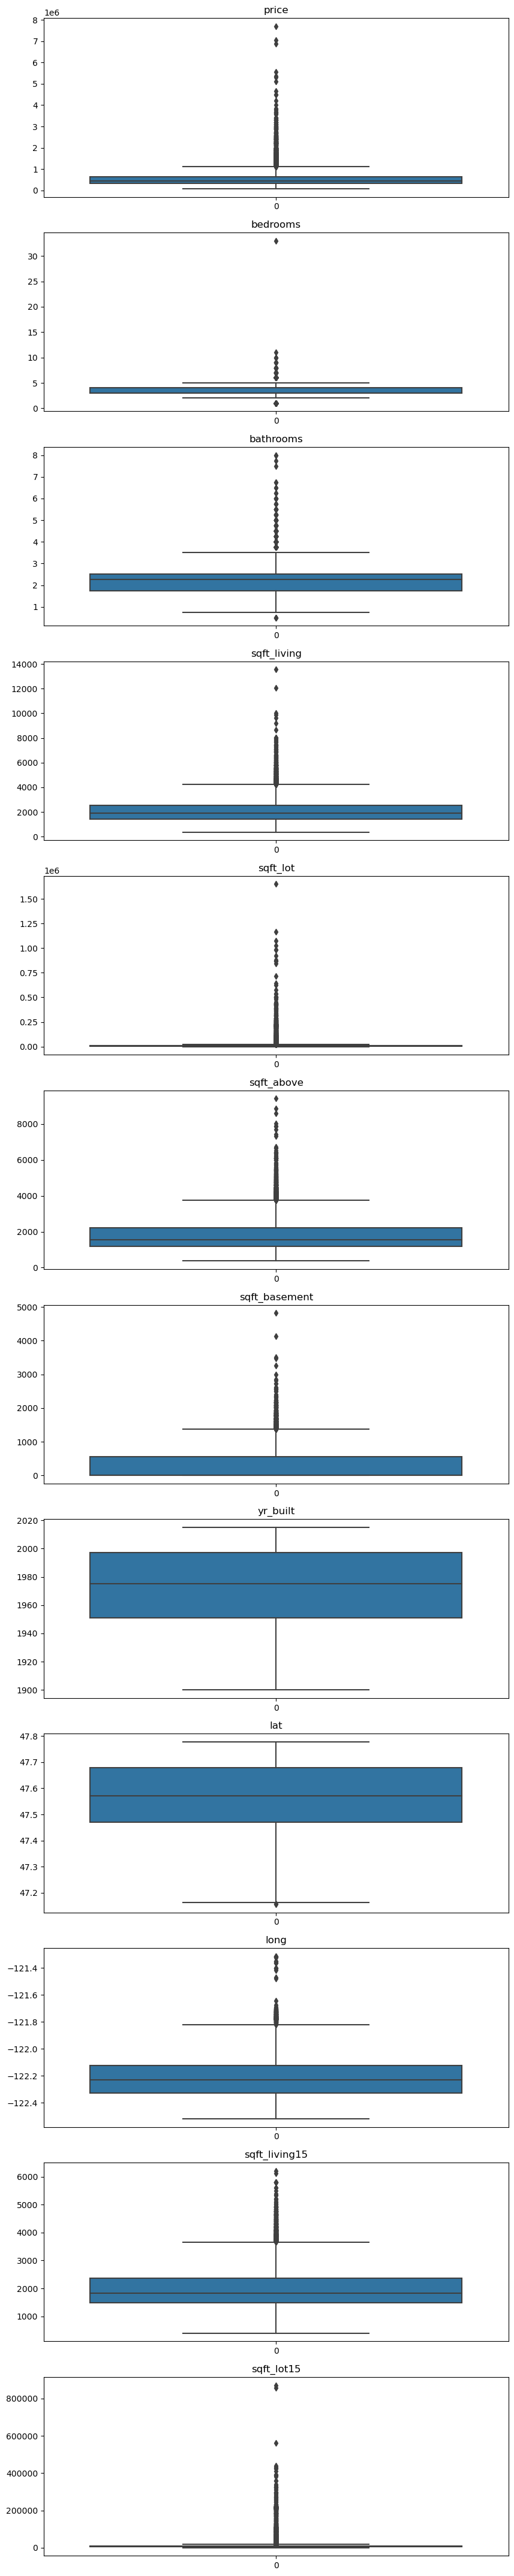

In [428]:
#Creating a function to plot boxplots for all columns except some columns
def boxplts(df, column_to_ignore):
    df_1 = df.copy()
    columns_to_plot = df_1.drop(column_to_ignore, axis=1).columns
    fig, axes = plt.subplots(nrows=len(columns_to_plot), figsize=(10,55))
    for column, axis in zip(columns_to_plot, axes):
        sns.boxplot(data=df[column], ax=axis)
        axis.set_title(column)
    plt.show()

boxplts(data, ['id', 'date', 'grade','zipcode', 'grade_levels', 'yr_renovated', 'waterfront', 'condition', 'view', 'floors'])


Some columns have outliers but we cannot be sure of how the outliers are going to affect our modeling.

In [430]:
#Investigating the bedroom column as it has an extreme value
data['bedrooms'].value_counts()

bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: count, dtype: int64

One property has 33 bedrooms which can be true or maybe impossibe depending on how you take it.

In [431]:
#creating a function to print all value counts for all columns
def all_valcounts(df):
    for column in df.columns:
        print("{} column name-".format(column))
        print(df[column].value_counts())
        print("-"*30)

all_valcounts(data)

id column name-
id
795000620     3
8910500150    2
7409700215    2
1995200200    2
9211500620    2
             ..
3649100387    1
2767603649    1
1446403617    1
5602000275    1
1523300157    1
Name: count, Length: 21420, dtype: int64
------------------------------
date column name-
date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2015-04-27    126
             ... 
2014-11-02      1
2015-01-31      1
2015-05-24      1
2014-05-17      1
2014-07-27      1
Name: count, Length: 372, dtype: int64
------------------------------
price column name-
price
450000.0    172
350000.0    172
550000.0    159
500000.0    152
425000.0    150
           ... 
278800.0      1
439888.0      1
354901.0      1
942000.0      1
402101.0      1
Name: count, Length: 3622, dtype: int64
------------------------------
bedrooms column name-
bedrooms
3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: c

The data from using both the boxplot method and vieiwng the value_counts method one can see inconsistence in the data and also see that the data has outliers.
- Bedrooms has a figure of 33 bedrooms which we can choose to ignore or take action against it.(maybe delete the row)
- id has also been repeated which can mean either the rows are repeated or there is another explanation to it.

- Investigating the 33 bedrooms occurence.

In [432]:
#Investigating the 33 bedrooms row 
data.loc[data['bedrooms'] == 33]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_levels
15856,2402100895,2014-06-25,640000.0,33,1.75,1620,6000,1.0,0,0,...,1040,580,1947,0.0,98103,47.6878,-122.331,1330,4700,7


- We are going to delete it as a house cant have 33 bedrooms and 1.75 bathrooms. It doesnt make sense.

In [433]:
#Dropping the row with 33 bedrooms
data.drop(index=15856, inplace=True)

- Investigating the id repetition occurence

In [434]:
#Checking the repeated id's as it is unique
repeated_id = data[data.duplicated(subset=['id'], keep=False)]
repeated_id

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15,grade_levels
93,6021501535,2014-07-25,430000.0,3,1.50,1580,5000,1.0,0,0,...,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500,8
94,6021501535,2014-12-23,700000.0,3,1.50,1580,5000,1.0,0,0,...,1290,290,1939,0.0,98117,47.6870,-122.386,1570,4500,8
313,4139480200,2014-06-18,1380000.0,4,3.25,4290,12103,1.0,0,2,...,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244,11
314,4139480200,2014-12-09,1400000.0,4,3.25,4290,12103,1.0,0,2,...,2690,1600,1997,0.0,98006,47.5503,-122.102,3860,11244,11
324,7520000520,2014-09-05,232000.0,2,1.00,1240,12092,1.0,0,0,...,960,280,1922,1984.0,98146,47.4957,-122.352,1820,7460,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20654,8564860270,2015-03-30,502000.0,4,2.50,2680,5539,2.0,0,0,...,2680,0,2013,0.0,98045,47.4759,-121.734,2680,5992,8
20763,6300000226,2014-06-26,240000.0,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598,7
20764,6300000226,2015-05-04,380000.0,4,1.00,1200,2171,1.5,0,0,...,1200,0,1933,0.0,98133,47.7076,-122.342,1130,1598,7
21564,7853420110,2014-10-03,594866.0,3,3.00,2780,6000,2.0,0,0,...,2780,0,2013,0.0,98065,47.5184,-121.886,2850,6000,9


- The id is a unique identfier of houses. We can say its safe to assume the houses were sold numerous times in the period. As they have same features.

## 5. EXPLORATORY DATA ANALYSIS

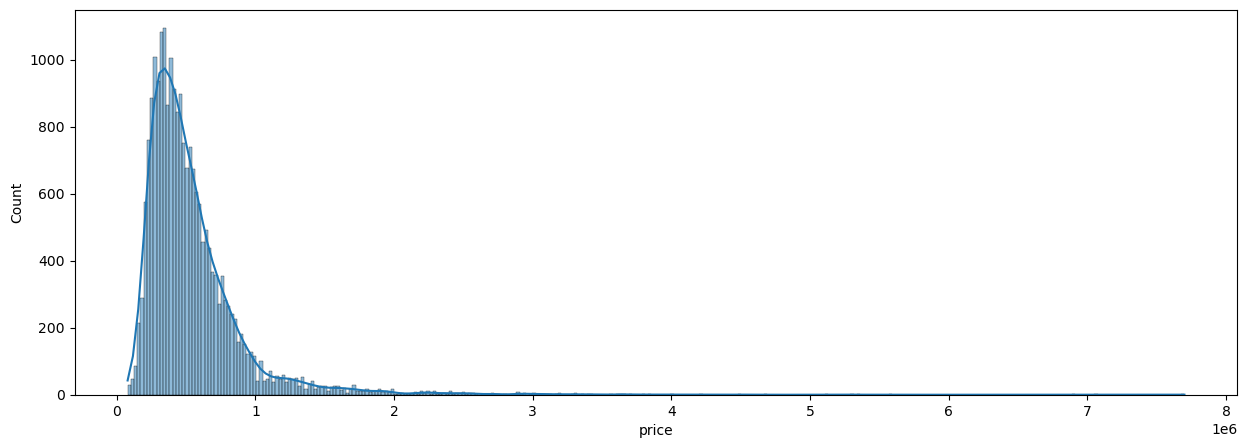

In [435]:
#Creating a plot to show the distribution of our target variable
plt.figure(figsize=(15,5))

sns.histplot(data['price'], kde=True)
plt.show()

- The distribution of the dependent variable is positively skewed. This can lead to heteroscedasticity which means that the variance of the residuals is not consatnt across all levels of the independent variable. This can lead to biased estimates of the regression coefficients and incorrect standard errors. It can also lead to non-normality of the residuals.

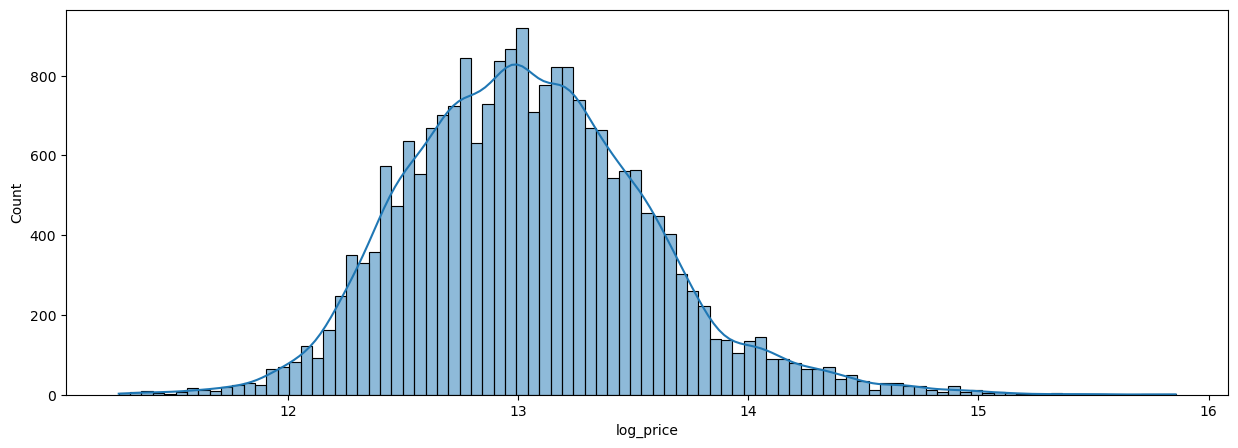

In [436]:
#Transforming our target variable using log transformations to make it normally distributed
data['log_price'] = np.log(data['price'])
plt.figure(figsize=(15,5))
sns.histplot(data['log_price'], kde=True)
plt.show()

- We transformed our dependent variable to get a normal distribution.

### Distribution of other Variables

In [437]:
#Visualizing our columns 
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_levels',
       'log_price'],
      dtype='object')

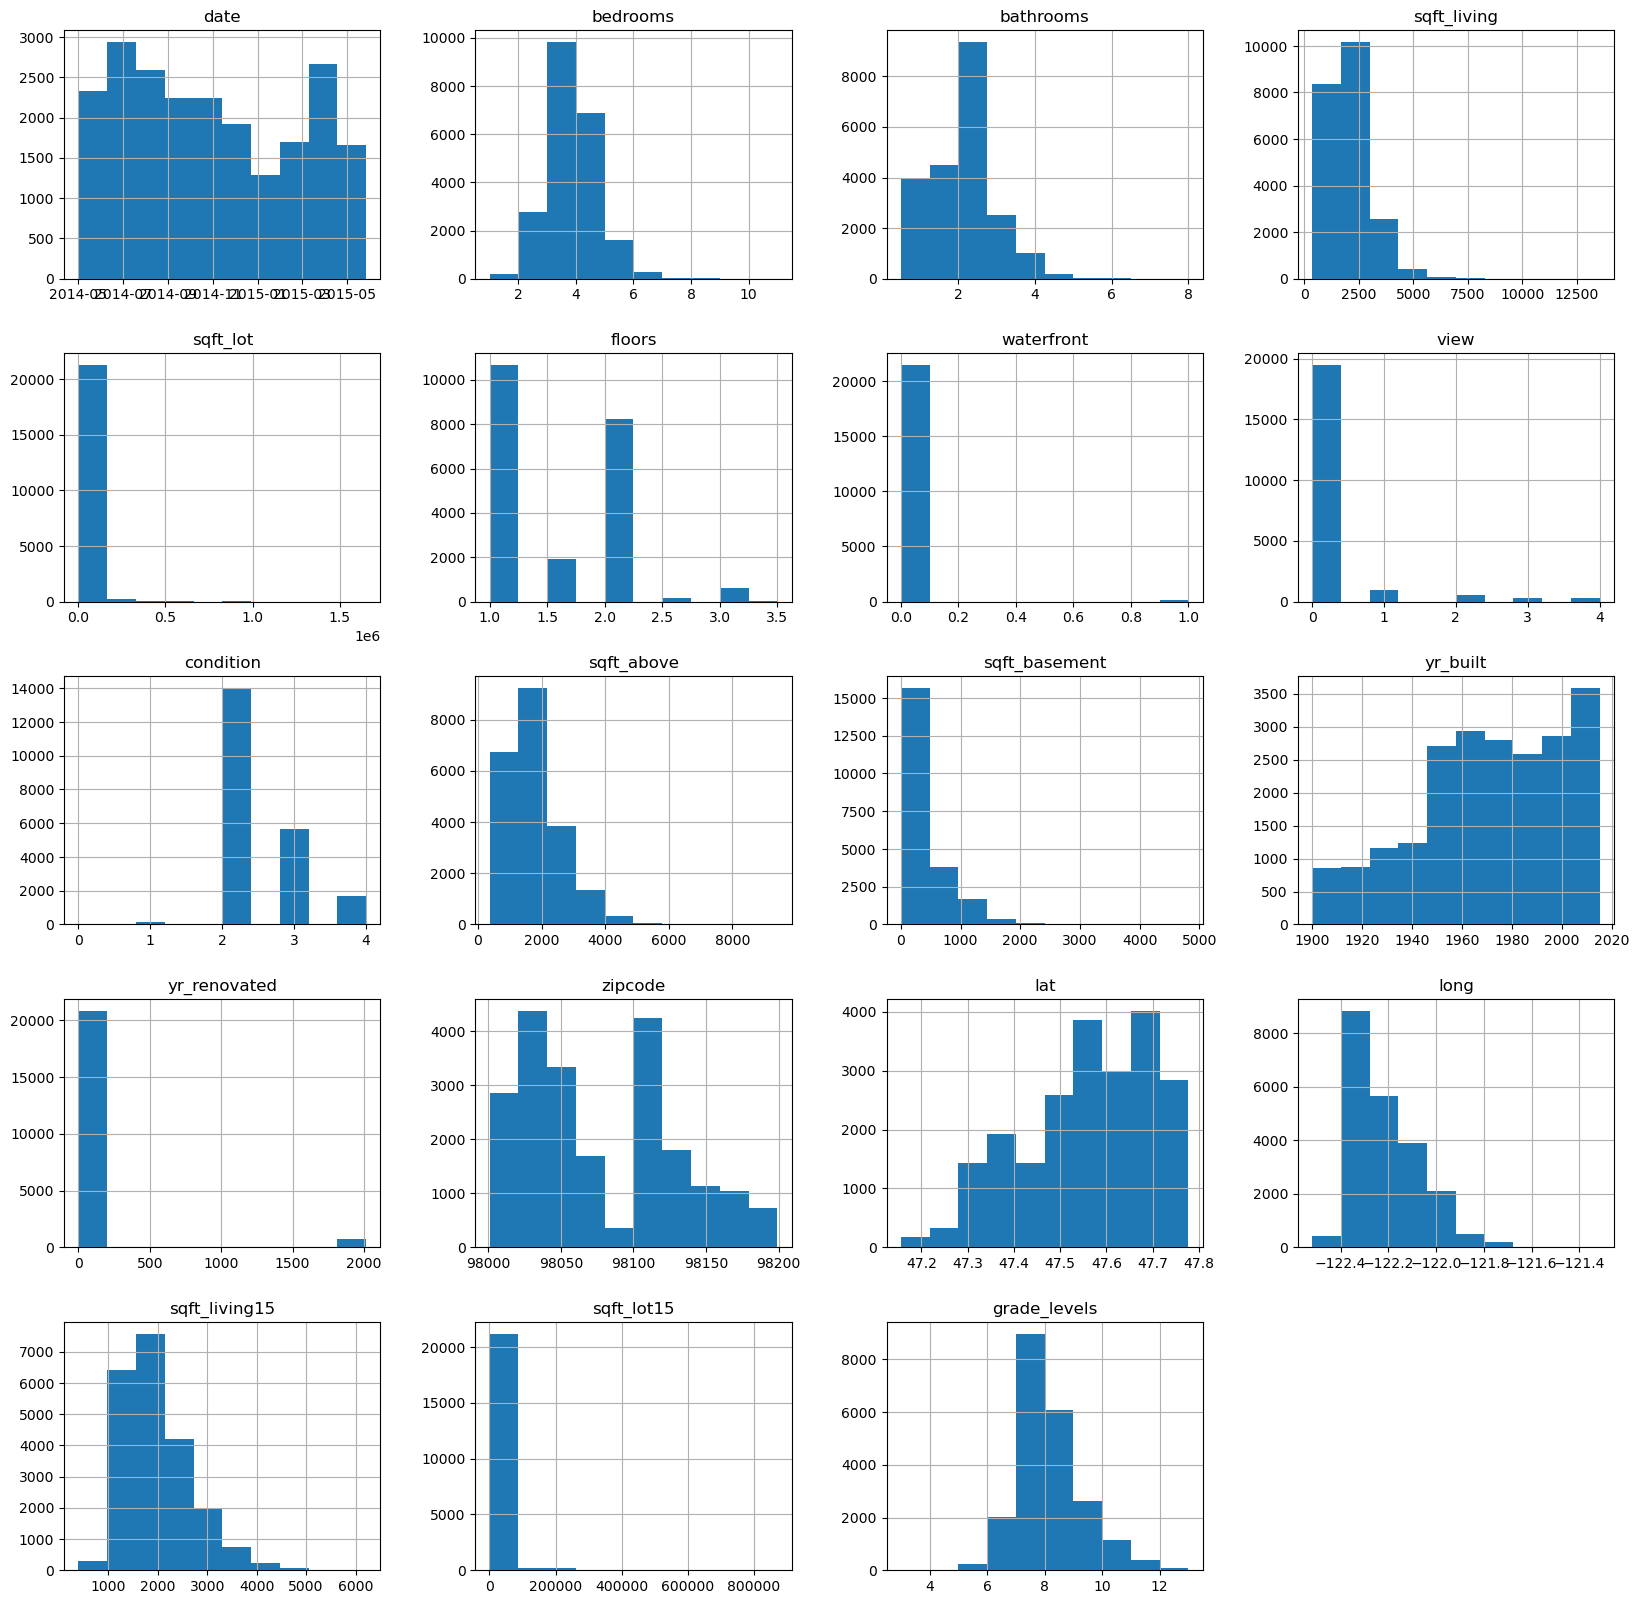

In [438]:
#Creating a new dataframe for plotting histograms of other columns to visualize their distribution
other_var = data.drop(['id', 'price', 'grade', 'log_price'], axis=1)
other_var.hist(figsize=(20,20))
plt.show()

### Feature Engineering

- Creating a column which will describe the ages of the houses

In [439]:
#Creating a new column age which will show age of the houses
data['age'] = 2015 - data['yr_built']
data['age']

0        60
1        64
2        82
3        50
4        28
         ..
21592     6
21593     1
21594     6
21595    11
21596     7
Name: age, Length: 21596, dtype: int64

- Create a new renovation column where if a house has been renovated it will be represented with '1' if not '0'

In [440]:
#Creating a new column renovated which will show if a prperty has been renovated before or not
data['renovated'] = data['yr_renovated'].apply(lambda x: 1 if x > 0 else 0)
data['renovated']

0        0
1        1
2        0
3        0
4        0
        ..
21592    0
21593    0
21594    0
21595    0
21596    0
Name: renovated, Length: 21596, dtype: int64

- Creating a new column distance which will show house distance from seattle.

In [441]:
#Creating a function that calculates distance

def distance(lat1, lon1, lat2, lon2):
    R = 6371.01  # Earth's radius in km

    # Convert latitude and longitude to radians
    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    # Calculate the distance between two points using Haversine formula
    dlon = lon2 - lon1
    dlat = lat2 - lat1
    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))
    distance = R * c

    return distance


In [442]:
# Coordinates for seattle are (47.6062N, 122.3321W)
data['distance'] = data.apply(lambda row: distance(row['lat'], row['long'], 47.6062, -122.3321), axis=1)


- Creating a new dataframe with columns we are going to need.


In [443]:
#Visualizing the columns again
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15', 'grade_levels',
       'log_price', 'age', 'renovated', 'distance'],
      dtype='object')

In [444]:
#Creating a new dataframe
dataset = data[['price', 'log_price', 'bedrooms', 'bathrooms', 'floors', 'condition', 'view', 'waterfront', 'sqft_above', 'sqft_basement', 'sqft_living', 'sqft_lot', 'age', 'grade_levels', 'renovated', 'distance']].copy()
dataset['age'].value_counts()

age
1      559
9      453
10     450
11     433
12     420
      ... 
82      30
114     29
113     27
80      24
81      21
Name: count, Length: 116, dtype: int64

#### PLotting all columns against price to view if the relationship is linear

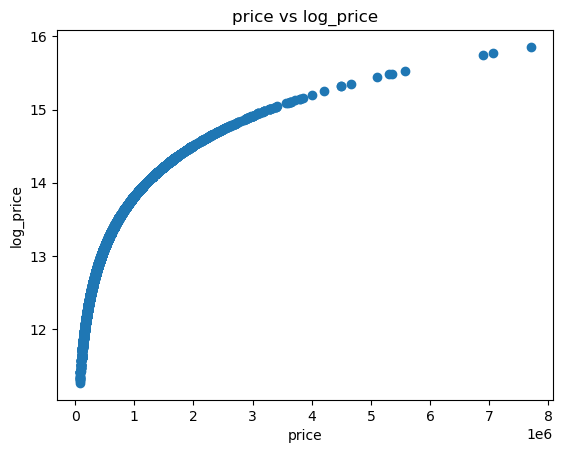

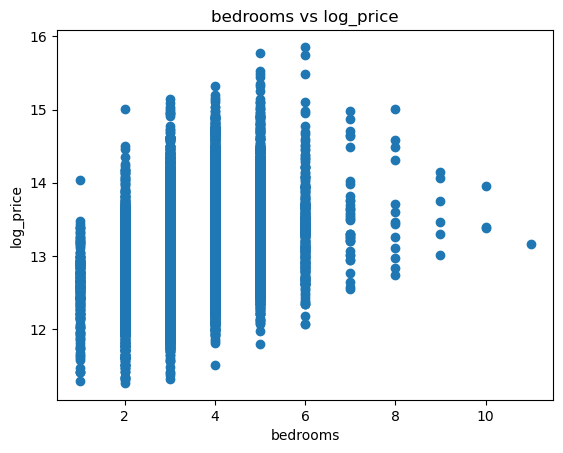

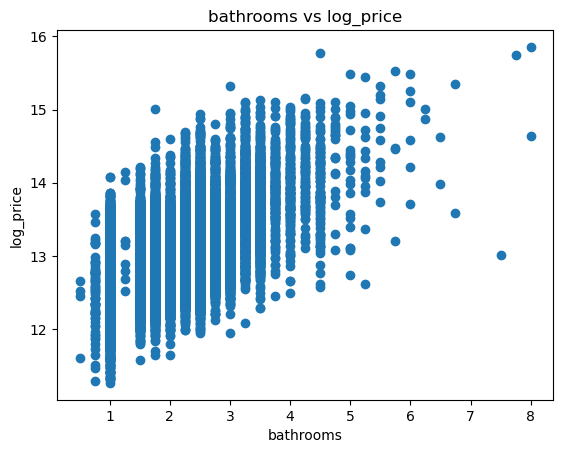

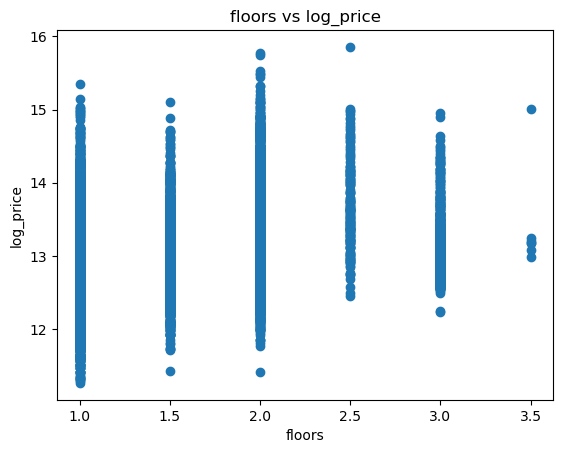

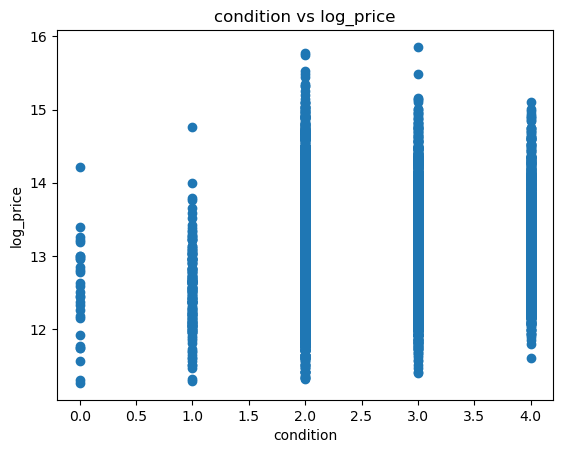

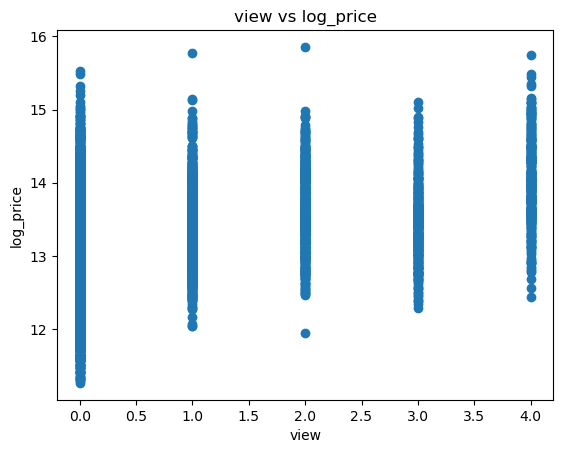

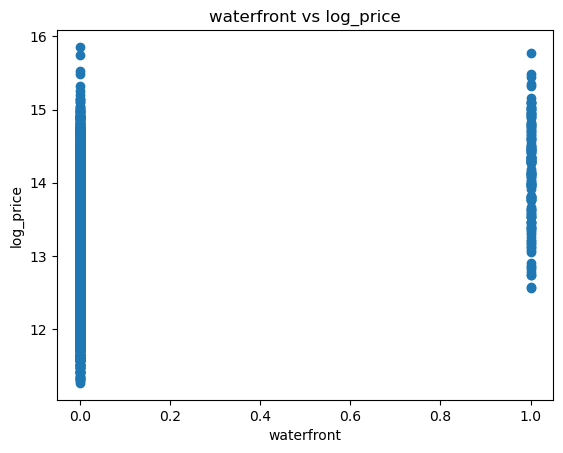

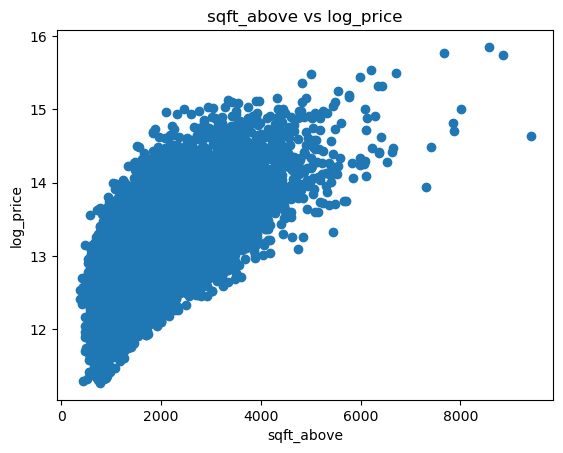

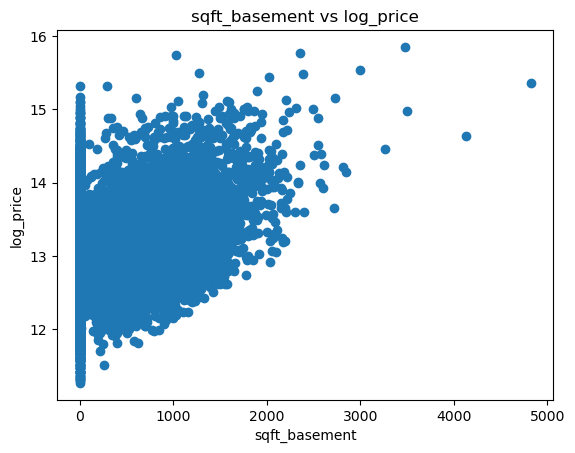

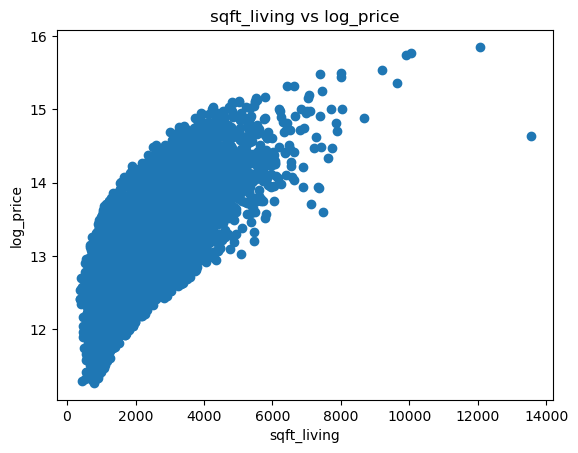

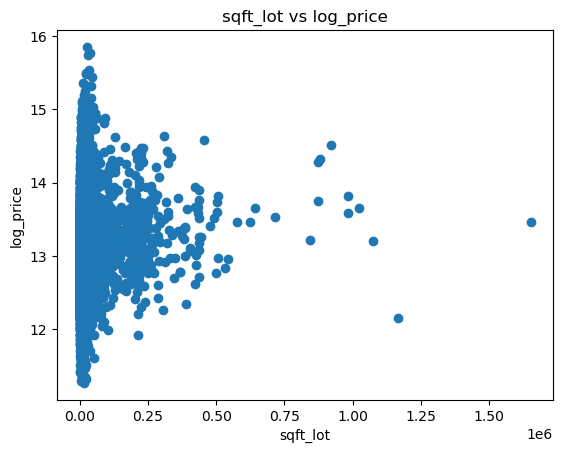

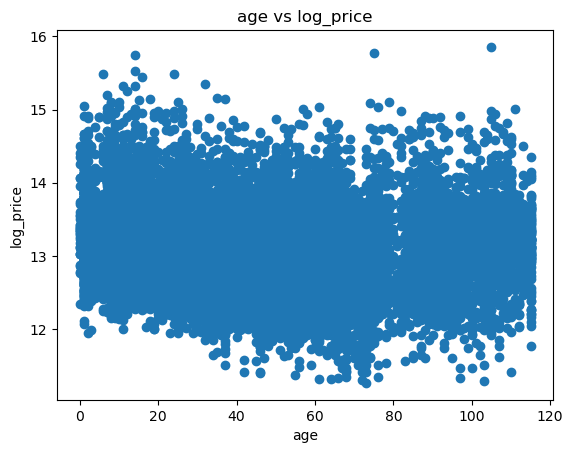

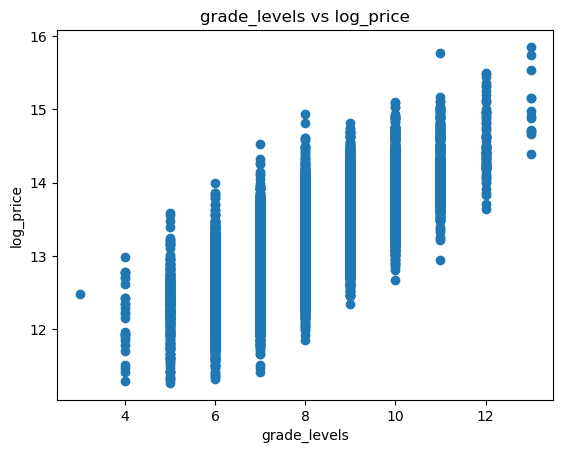

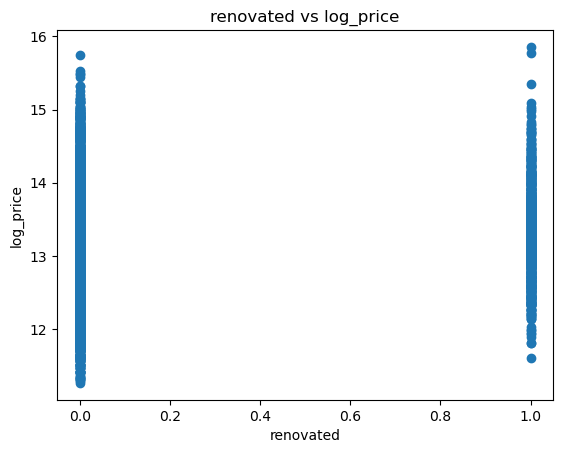

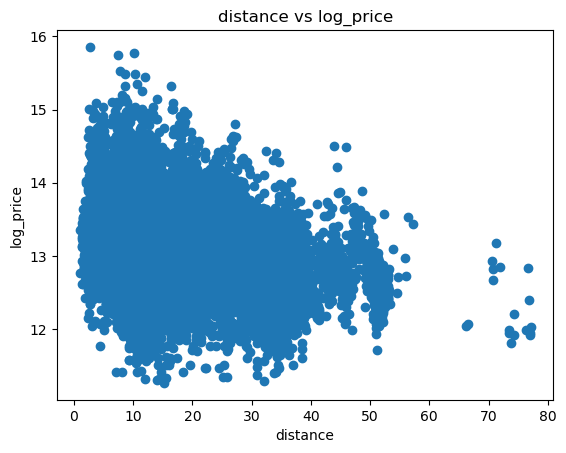

In [445]:
#Creating a function to plot the scatter plots
def scater_plts(df, yy):
    for col in df.columns:
        if col != yy:
            plt.scatter(df[col], df[yy])
            plt.xlabel(col)
            plt.ylabel(yy)
            plt.title(f"{col} vs {yy}")
            plt.show()

scater_plts(dataset, 'log_price')

- From the scatter plots plotted only a few show a linear relationship.
    - sqft_living
    - sqft_above
    - sqft_basement

### Multicollinearity

We are going to do a collinearity check to see if we have any variable with a perfect relationship which can lead to unstable estimates of regression coefficients.

In [446]:
#Looking at the shape of our new dataframe
dataset.shape

(21596, 16)

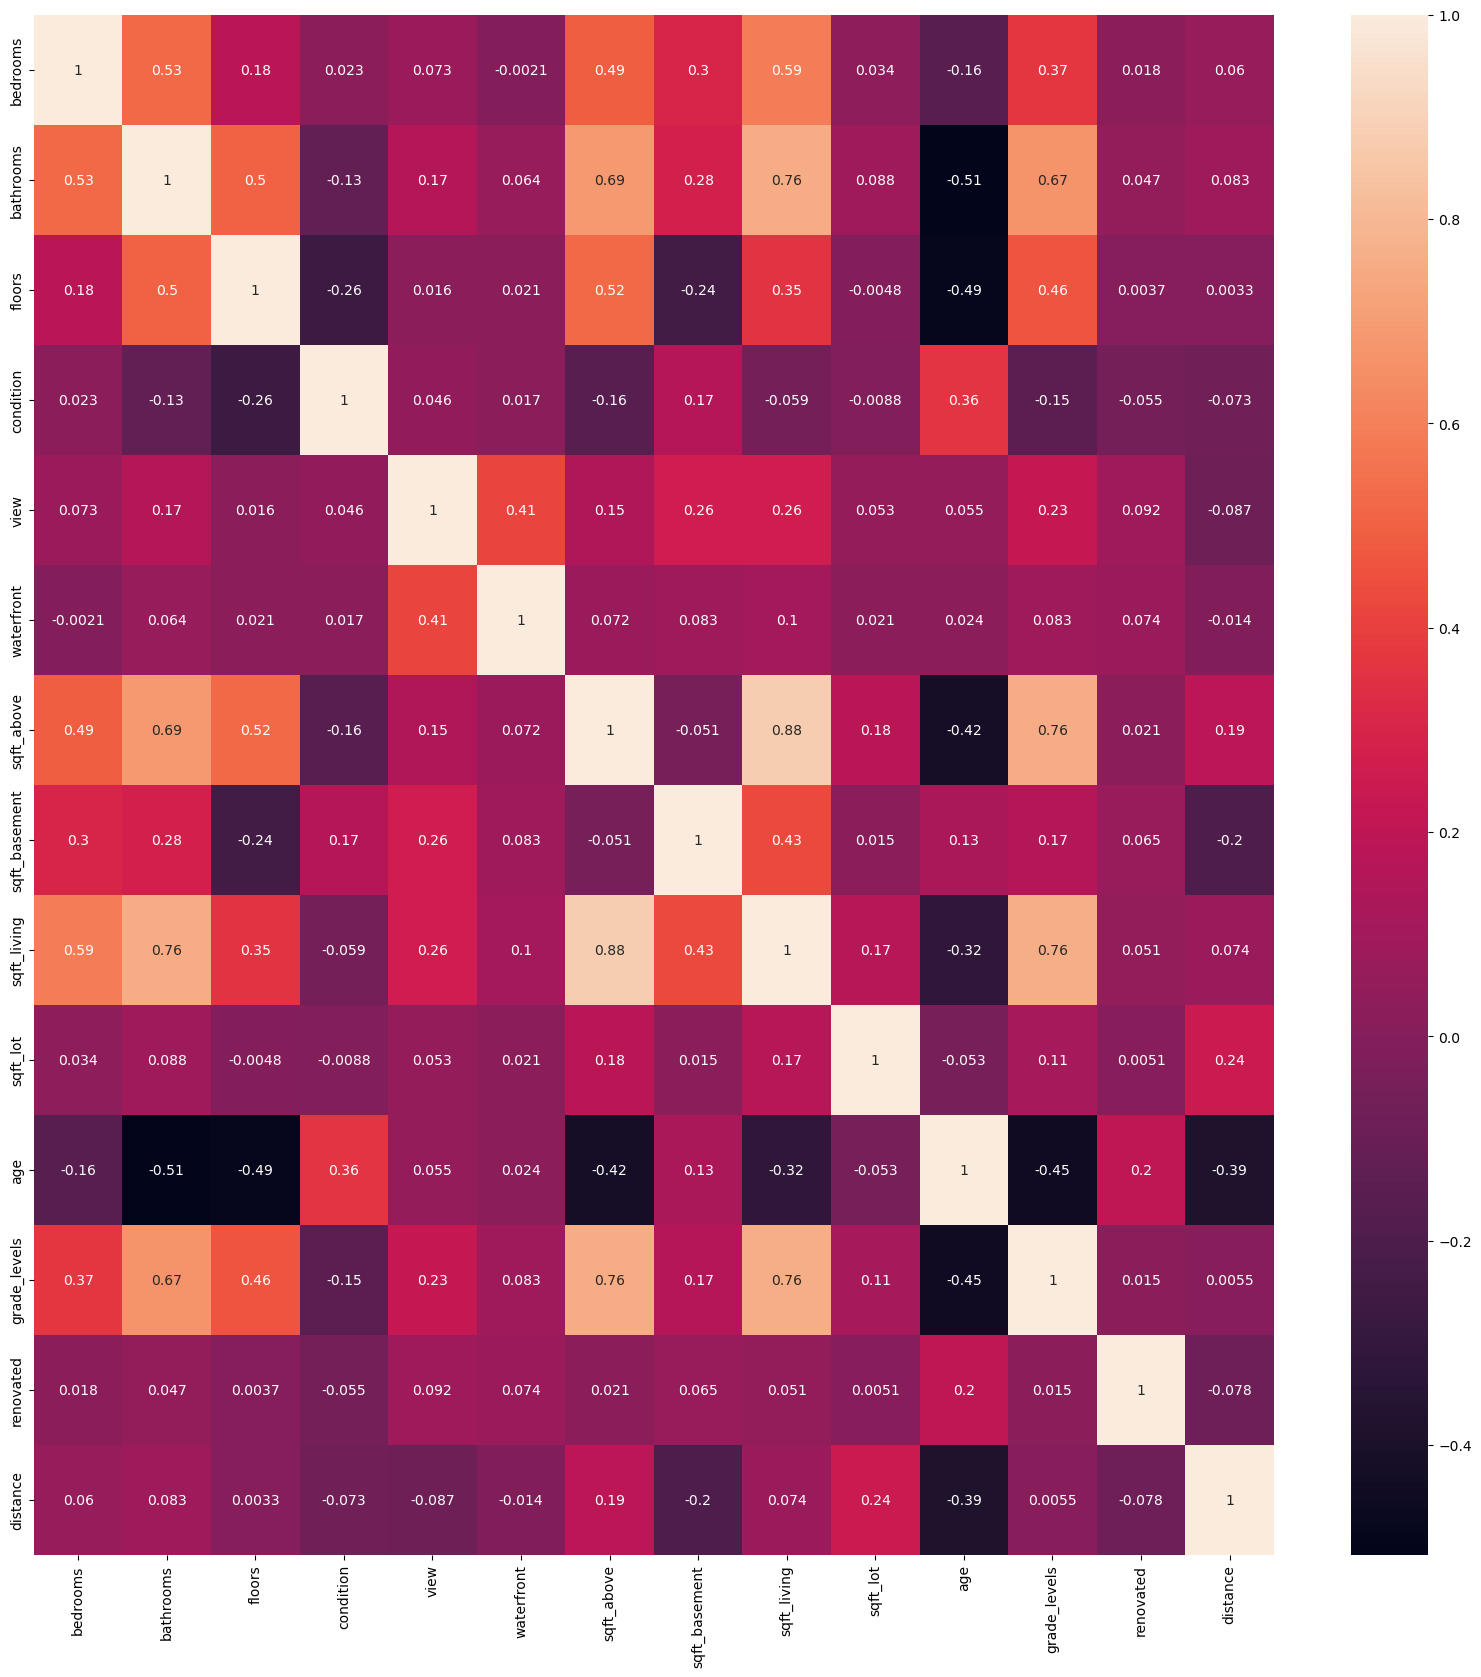

In [447]:
#Filtering some columns before plotting our correlation heat map
dataset_cor = dataset.iloc[:,2:16]
corelation_matrix = dataset_cor.corr()
plt.figure(figsize=(20,20))
sns.heatmap(corelation_matrix, annot=True)
plt.show()

- There is no variable with a perfect linear relationship.

In [448]:
#Viewing which columns have the most correlation value
df = dataset_cor.corr().abs().stack().reset_index().sort_values(0, ascending=False)
df['pairs'] = list(zip(df.level_0, df.level_1))
df.set_index(['pairs'], inplace = True)
df.drop(columns=['level_1', 'level_0'], inplace=True)
df.columns = ['cc']
df.drop_duplicates(inplace=True)

df[(df.cc>.75) & (df.cc < 1)]

,cc
pairs,
"(sqft_above, sqft_living)",0.876448
"(grade_levels, sqft_living)",0.762776
"(grade_levels, sqft_above)",0.756069
"(bathrooms, sqft_living)",0.755755


- sqft_living is strongly correlated with sqft_above and grade_levels. We are going to drop sqft_above as it seems redudant when we already have sqft_living

In [451]:
#Drooping the column 
dataset = dataset.drop(columns=['sqft_above'])

KeyError: "['sqft_above'] not found in axis"

In [450]:
print(dataset.columns)
print(dataset.info())

Index(['price', 'log_price', 'bedrooms', 'bathrooms', 'floors', 'condition',
       'view', 'waterfront', 'sqft_basement', 'sqft_living', 'sqft_lot', 'age',
       'grade_levels', 'renovated', 'distance'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
Index: 21596 entries, 0 to 21596
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   price          21596 non-null  float64
 1   log_price      21596 non-null  float64
 2   bedrooms       21596 non-null  int64  
 3   bathrooms      21596 non-null  float64
 4   floors         21596 non-null  float64
 5   condition      21596 non-null  int64  
 6   view           21596 non-null  int64  
 7   waterfront     21596 non-null  int64  
 8   sqft_basement  21596 non-null  int32  
 9   sqft_living    21596 non-null  int64  
 10  sqft_lot       21596 non-null  int64  
 11  age            21596 non-null  int64  
 12  grade_levels   21596 non-null  int32  
 13  ren

### Linear Regression

We are going to set our hypothesis
- Null hypothesis - There is no significant relationship between the target variable and the independent variables.
- ALternative hypothesis - There is a significant relationship between the target variable and the independent variables.

Our alpha value is going to be 0.05

#### Model 1

In [452]:
#Create our X and y for model 1
y = dataset['log_price']
X = dataset['sqft_living']

#Creating the model 
model_1 = sm.OLS(y, sm.add_constant(X)).fit()
model_1.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.483
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                 2.020e+04
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:06:10   Log-Likelihood:                -9661.4
No. Observations:               21596   AIC:                         1.933e+04
Df Residuals:                   21594   BIC:                         1.934e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          12.2187      0.006   1915.377      0.000      12.206      12.231
sqft_living     0.0004   2.81e-06    142.125      0.000       0.000       0.000
==============================================================================
Omnibus:                        3.543   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.170   Jarque-Bera (JB):                3.564
Skew:                           0.028   Prob(JB):                        0.168
Kurtosis:                       2.973   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Interpretation
    - We have a R-squared value of 0.483 which means that 48.3% of the variation in the dependent variable is explained by the independent variable.
    - The coefficient estimate for sqft_living is 0.0004 which means that for every one unit increase in sqft_living, the log_price increases by 0.0004 units.
    - The p-value for sqft_living is less than 0.05 which means that the relationship between sqft_living and log_price is statistically significant.
    - For each increase of 1 unit in sqft_living we see an increase of 0.04% in price

#### Model 2

In [453]:
#Create our X and y for the model 2
y = dataset['log_price']
X_2 = dataset[['sqft_living', 'sqft_basement', 'sqft_lot']]

#Creating the model 
model_2 = sm.OLS(y, sm.add_constant(X_2)).fit()
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     6751.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:06:13   Log-Likelihood:                -9647.3
No. Observations:               21596   AIC:                         1.930e+04
Df Residuals:                   21592   BIC:                         1.933e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            12.2213      0.006   1897.000      0.000      12.209      12.234
sqft_living       0.0004   3.16e-06    125.576      0.000       0.000       0.000
sqft_basement  2.037e-05   6.49e-06      3.137      0.002    7.64e-06    3.31e-05
sqft_lot      -2.562e-07   6.33e-08     -4.050      0.000    -3.8e-07   -1.32e-07
==============================================================================
Omnibus:                        2.143   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                2.163
Skew:                           0.023   Prob(JB):                        0.339
Kurtosis:                       2.982   Cond. No.                     1.10e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Interpretation
    - We have a R-squared value of 0.484 which means that 48.4% of the variation in the dependent variable is explained by the independent variables.
    - All three independent variables have p-values less then 0.05 that means the relationship is statistically significant.
    - The coefficient estimate for sqft_living is 0.0004 which means that for every one unit increase in sqft_living, the log_price increases by 0.04%.
    - The coefficient estimate for sqft_basement is 2.037e-05 which means that for every one unit increase in sqft_basement, the log_price increases by 0.002037%.
    - The coefficient estimate for sqft_lot is -2.562e-07 which means that for every one unit increase in sqft_lot, the log_price decreases by 0.00002562% .

#### Model 3

In [454]:
#Create our X and y for the model 2
y = dataset['log_price']
X_3 = dataset[['sqft_living', 'sqft_basement', 'sqft_lot', 'grade_levels']]

#Creating the model 
model_3 = sm.OLS(y, sm.add_constant(X_3)).fit()
model_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.564
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     6988.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:06:16   Log-Likelihood:                -7823.0
No. Observations:               21596   AIC:                         1.566e+04
Df Residuals:                   21591   BIC:                         1.570e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.0842      0.019    583.866      0.000      11.047      11.121
sqft_living       0.0002   4.58e-06     37.824      0.000       0.000       0.000
sqft_basement     0.0001   6.21e-06     20.827      0.000       0.000       0.000
sqft_lot      -8.027e-08   5.82e-08     -1.379      0.168   -1.94e-07    3.38e-08
grade_levels      0.2047      0.003     63.041      0.000       0.198       0.211
==============================================================================
Omnibus:                       36.165   Durbin-Watson:                   1.972
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               36.291
Skew:                           0.100   Prob(JB):                     1.32e-08
Kurtosis:                       3.026   Cond. No.                     3.58e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.58e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Interpretation
    - We have a R-squared value of 0.564 which means that 56.4% of the variation in the dependent variable is explained by the indepedent variables. This is an increase from our previous model.
    - The coefficient estimate for sqft_living is 0.0002 which means that for every one unit increase in sqft_living, the log_price increases by 0.02%.
    - The coefficient estimate for sqft_basement is 0.0001 which means that for every one unit increase in sqft_basement, the log_price increases by 0.01%.
    - The coefficient estimate for sqft_lot is -8.027e-08 which means that for every one unit increase in sqft_lot, the log_price decreases by 8.027e-08 units.
    - The coefficient estimate for grade_levels is 0.2047 which means that for every one unit increase in grade_levels, the log_price increases by 20.47%

#### Model 4

In [455]:
#Create our X and y for the model 2
y = dataset['log_price']
X_4 = dataset[['sqft_living', 'sqft_basement', 'sqft_lot', 'grade_levels','condition', 'floors', 'renovated', 'age']]

#Creating the model 
model_4 = sm.OLS(y, sm.add_constant(X_4)).fit()
model_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.633
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     4653.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:06:20   Log-Likelihood:                -5969.7
No. Observations:               21596   AIC:                         1.196e+04
Df Residuals:                   21587   BIC:                         1.203e+04
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            10.2838      0.022    459.185      0.000      10.240      10.328
sqft_living       0.0002   4.33e-06     38.805      0.000       0.000       0.000
sqft_basement  9.823e-05   6.35e-06     15.478      0.000    8.58e-05       0.000
sqft_lot       2.555e-08   5.37e-08      0.475      0.635   -7.98e-08    1.31e-07
grade_levels      0.2428      0.003     77.650      0.000       0.237       0.249
condition         0.0448      0.004     12.220      0.000       0.038       0.052
floors            0.1291      0.005     24.485      0.000       0.119       0.139
renovated         0.0664      0.012      5.335      0.000       0.042       0.091
age               0.0051   9.62e-05     52.961      0.000       0.005       0.005
==============================================================================
Omnibus:                       90.461   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.070
Skew:                          -0.058   Prob(JB):                     2.30e-26
Kurtosis:                       3.343   Cond. No.                     4.59e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.59e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Interpretation
    - We have a R-squared value of 0.633 which means that 63.3% of the variation in the dependent variable is explained by the independent variables.
    - The coefficient estimate for sqft_living is 0.0002 which means that for every one unit increase in sqft_living, the log_price increases by 0.02%.
    - The coefficient estimate for sqft_basement is 9.823e-05 which means that for every one unit increase in sqft_basement, the log_price increases by 0.009823%
    - The coefficient estimate for sqft_lot is 2.555e-08 which means that for every one unit increase in sqft_lot, the log_price increases by 0.00000255%.
    - The coefficient estimate for grade_levels is 0.2428 which means that for every one unit increase in grade_levels, the log_price increases by 24.28%.
    - The coefficient estimate for condition is 0.0448 which means that for every one unit increase in condition, the log_price increases by 4.48%.
    - The coefficient estimate for floors is 0.1291 which means that for every one unit increase in floors, the log_price increases by 12.91%.
    - The coefficient estimate for renovated is 0.0664 which means that if a house has been renovated, the log_price increases by 6.64%.
    - The coefficient estimate for age is 0.0051 which means that for every one year increase in age of a house, the log_price increases by 0.51%.
    - We can also notice that the p-value of sqf_lot is more than 0.05 hence statistically insignificant. 

#### Model 5

In [456]:
#Create our X and y for the model 2
y = dataset['log_price']
X_5 = dataset[['sqft_living', 'sqft_basement', 'bedrooms', 'bathrooms', 'view', 'waterfront', 'grade_levels','condition', 'renovated', 'age', 'distance']]

#Creating the model 
model_5 = sm.OLS(y, sm.add_constant(X_5)).fit()
model_5.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              log_price   R-squared:                       0.733
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     5388.
Date:                Sun, 09 Jul 2023   Prob (F-statistic):               0.00
Time:                        11:06:23   Log-Likelihood:                -2531.7
No. Observations:               21596   AIC:                             5087.
Df Residuals:                   21584   BIC:                             5183.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const            11.2717      0.022    503.347      0.000      11.228      11.316
sqft_living       0.0002   4.46e-06     54.531      0.000       0.000       0.000
sqft_basement -7.943e-05   5.23e-06    -15.197      0.000   -8.97e-05   -6.92e-05
bedrooms         -0.0209      0.003     -7.867      0.000      -0.026      -0.016
bathrooms         0.0563      0.004     13.221      0.000       0.048       0.065
view              0.0590      0.003     18.771      0.000       0.053       0.065
waterfront        0.3361      0.025     13.513      0.000       0.287       0.385
grade_levels      0.1721      0.003     61.333      0.000       0.167       0.178
condition         0.0648      0.003     20.635      0.000       0.059       0.071
renovated         0.0787      0.011      7.351      0.000       0.058       0.100
age               0.0017   9.58e-05     17.672      0.000       0.002       0.002
distance         -0.0174      0.000    -85.899      0.000      -0.018      -0.017
==============================================================================
Omnibus:                      380.732   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              650.522
Skew:                          -0.148   Prob(JB):                    5.51e-142
Kurtosis:                       3.797   Cond. No.                     3.10e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.1e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- Interpretation
    - sqft_living: A one-unit increase in square footage of the home results in a 0.02% increase in log_price while holding all other independent variables constant.

    - sqft_basement: A one-unit increase in square footage of the basement results in a 0.008% decrease in log_price while holding all other independent variables constant.

    - bedrooms: A one-unit increase in the number of bedrooms results in a 2.09%% decrease in log_price while holding all other independent variables constant.

    - bathrooms: A one-unit increase in the number of bathrooms results in a 5.63% increase in log_price while holding all other independent variables constant.
    
    - view: A one-unit increase in view index results in a 5.9% increase in log_price while holding all other independent variables constant.

    - waterfront: A dummy variable indicating whether the property is located on a waterfront (1) or not (0). If waterfront=1, then log_price increases by 33.61% while holding all other independent variables constant.

    - grade_levels: A one unit increase in grade_levels of the property results in a 17.21% increase in log_price.

    - condition: A one unit increase in condition status of the property leads to a 6.48% increase in log_price.

    - renovated: A dummy variable indicating whether the property had been renovated (1) or not (0). If renovated=1, then log_price increases by 7.87% while holding all other independent variables constant.

    - age: A one-unit increase in age of the house results in a 0.17% increase in log_price while holding all other independent variables constant.

    - distance: A one-unit increase in distance from the house to downtown Seattle results in a 1.74% decrease in log_price while holding all other independent variables constant

In general the model has a R-squared of 0.733 which means that 73.3% of the variation in the dependent variable is explained by the independent variables.This model is better than our other models. The F-Statistic is a high value(5388) and the F-Statistic p-value is lower than 0.05 meaning that there is a relationship between the dependent variable and independent variables.

We are going to reject our null hypothesis that there is no significant relationship between the target variable and independent variables.

#### Partial Residual Plots

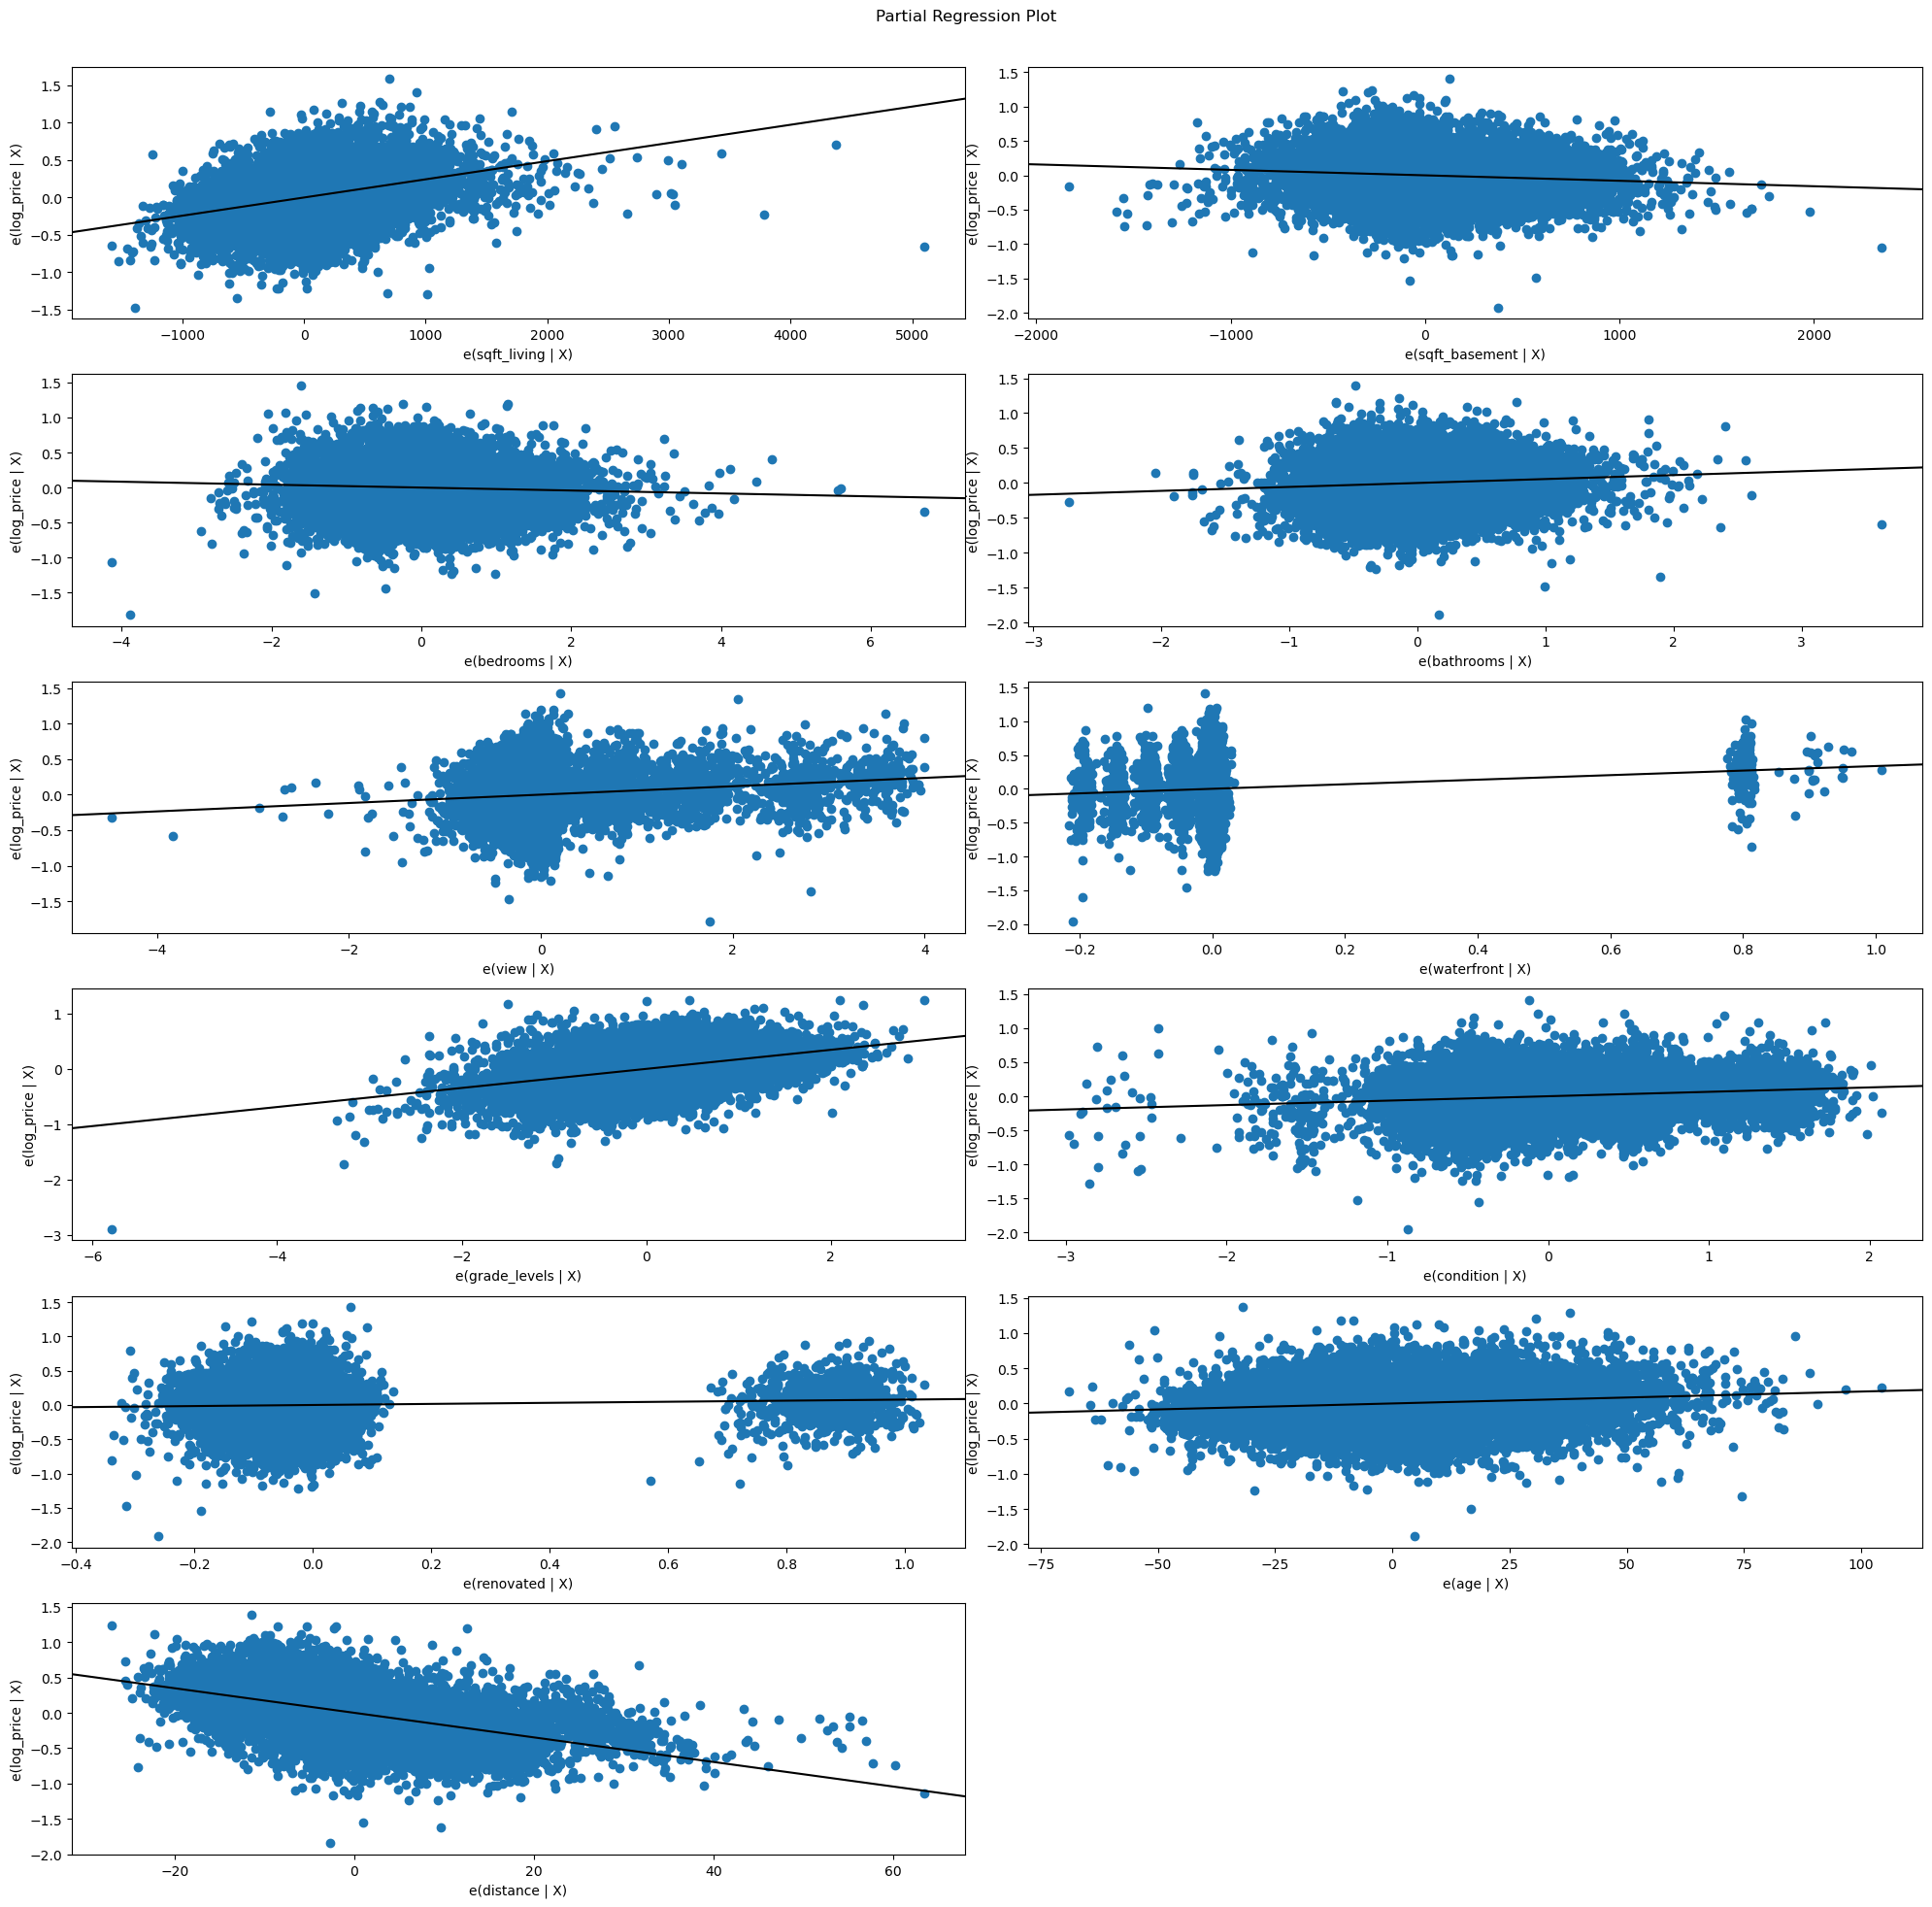

In [457]:
#Creating our partial regression plot
fig = plt.figure(figsize = (20,20))
sm.graphics.plot_partregress_grid(model_5, exog_idx = list(X_5.columns.values), fig=fig)
plt.show()

## CONCLUSION

- The variables with the highest positive impact on the price of a house are water_front and grade_levels of the property.
- The variables with mid level positive impact on the price of a property are bathrooms, view, condition and renovation status.
- The variables with lowest positive impact on the price are sqft_living and age.
- The variables with a negative impact on the price of a property are:
    - sqft_basement
    - bedrooms
    - distance

## RECOMMENDATIONS

- The real estate will advise sellers to renovate their properties before putting them in the market as it will increase the relative price of the property.
- The real estate agency would advise buyers of properties on the market depending on the budget of the buyers the factors that affect price of a property hence be able to effectively deliver their best services to the buyers. For Example: If a buyer wants to buy a property on the waterfront the real estate agency would a advise the client that a property on the waterfront will likely to have a higher price than that which is not located at the waterfront. This will be applied widely depending on what the client wants or doesnt want.
- The real estate will advise contractors and clients on how different types of properties perform in the real estate market hence one can select a property type which is likely to be more profitable in the market as real estate is all about profit margins. For example the agency might suggest to the contractor/client to build a higher grade_level property such as a mansion and also near the waterfront as these will boost the price of the property hence making it more profitable.